Saving ss.png to ss.png
✅ Loaded image: ss.png


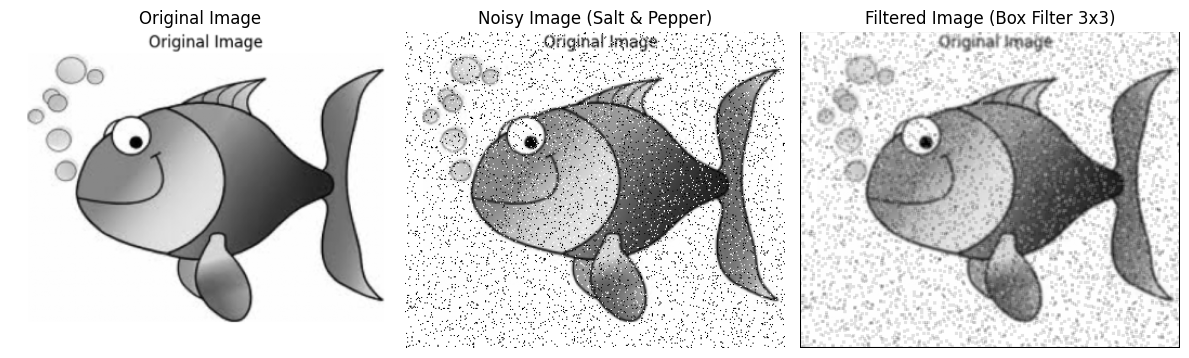

In [3]:
# --- Step 1: Upload image ---
from google.colab import files
import cv2, numpy as np, matplotlib.pyplot as plt

uploaded = files.upload()   # choose your file (e.g. Fish.jpg or bed00596-4780-4afc-ba6a-09dcc2ab82ef.png)

# --- Step 2: Detect uploaded file name automatically ---
image_path = list(uploaded.keys())[0]
print("✅ Loaded image:", image_path)

# --- Step 3: Read image in grayscale ---
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Image not found. Please upload again.")

# --- Step 4: Add Salt-and-Pepper Noise ---
salt_prob, pepper_prob = 0.05, 0.05
noisy_image = np.copy(image)

num_salt = np.ceil(salt_prob * image.size)
coords_salt = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
noisy_image[tuple(coords_salt)] = 255

num_pepper = np.ceil(pepper_prob * image.size)
coords_pepper = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
noisy_image[tuple(coords_pepper)] = 0

# --- Step 5: Apply 3x3 Box (Mean) Filter ---
filtered_image = np.zeros_like(noisy_image)
height, width = noisy_image.shape
for i in range(1, height - 1):
    for j in range(1, width - 1):
        neighborhood = noisy_image[i-1:i+2, j-1:j+2]
        filtered_image[i, j] = np.uint8(np.mean(neighborhood))

# --- Step 6: Display Results ---
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Salt & Pepper)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Box Filter 3x3)')
plt.axis('off')

plt.tight_layout()
plt.show()


Saving ss.png to ss (1).png
✅ Uploaded file: ss (1).png


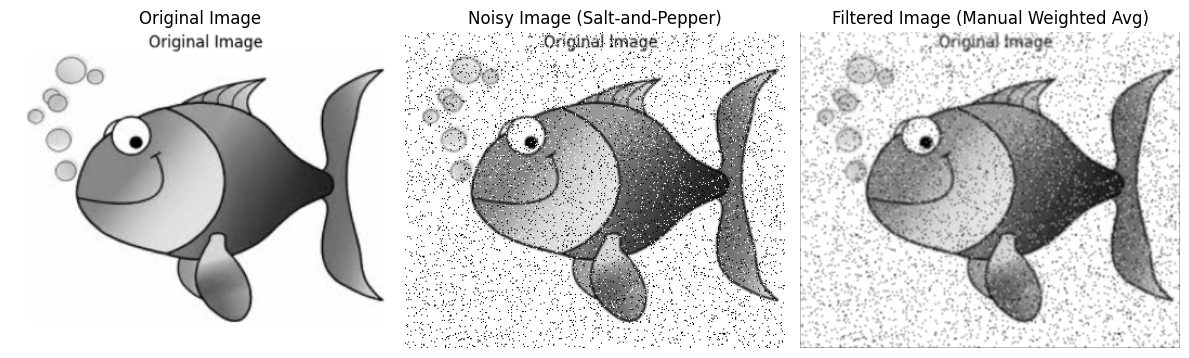

In [5]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# 🔹 Step 1: Upload the image
uploaded = files.upload()

# 🔹 Step 2: Get uploaded filename
filename = next(iter(uploaded))
print("✅ Uploaded file:", filename)

# 🔹 Step 3: Read image in grayscale
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# 🔹 Step 4: Add Salt-and-Pepper Noise
salt_prob = 0.05
pepper_prob = 0.05

noisy_image = np.copy(image)

num_salt = np.ceil(salt_prob * image.size)
coords_salt = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
noisy_image[tuple(coords_salt)] = 255

num_pepper = np.ceil(pepper_prob * image.size)
coords_pepper = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
noisy_image[tuple(coords_pepper)] = 0

# 🔹 Step 5: Gaussian Weighted Filter (Manual)
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16.0

image_height, image_width = noisy_image.shape
kernel_size = kernel.shape[0]
pad = kernel_size // 2

padded_image = np.pad(noisy_image, pad, mode='constant', constant_values=0)
filtered_image = np.zeros_like(noisy_image)

for i in range(pad, image_height + pad):
    for j in range(pad, image_width + pad):
        roi = padded_image[i - pad:i + pad + 1, j - pad:j + pad + 1]
        filtered_value = np.sum(roi * kernel)
        filtered_image[i - pad, j - pad] = np.clip(filtered_value, 0, 255)

# 🔹 Step 6: Display the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Salt-and-Pepper)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Manual Weighted Avg)')
plt.axis('off')

plt.tight_layout()
plt.show()


Saving ss.png to ss (2).png
✅ Uploaded file: ss (2).png


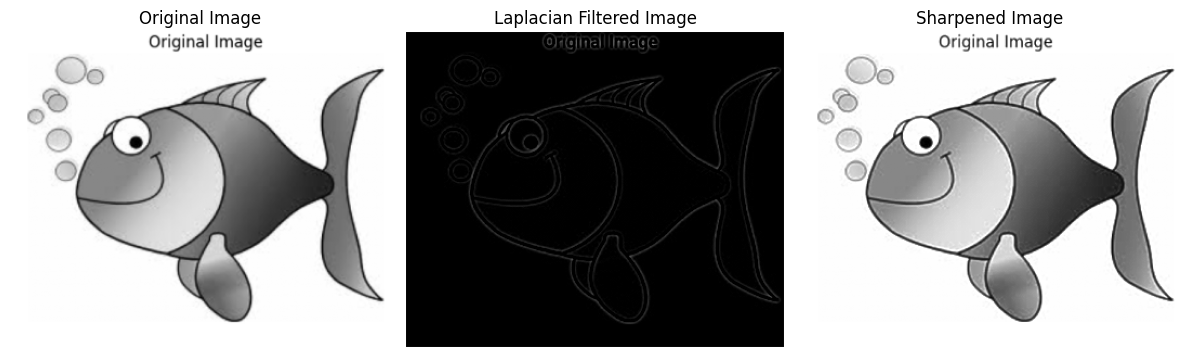

In [6]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Step 1: Upload image
uploaded = files.upload()

# 🔹 Step 2: Auto-detect filename
filename = next(iter(uploaded))
print("✅ Uploaded file:", filename)

# 🔹 Step 3: Read image in grayscale
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# 🔹 Step 4: Apply Gaussian blur (to reduce noise)
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

# 🔹 Step 5: Define Laplacian kernel (edge detector)
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

# 🔹 Step 6: Manual convolution with Laplacian kernel
image_height, image_width = blurred_image.shape
kernel_height, kernel_width = laplacian_kernel.shape
pad_h, pad_w = kernel_height // 2, kernel_width // 2

padded_image = np.pad(blurred_image, ((pad_h, pad_h), (pad_w, pad_w)),
                      mode='constant', constant_values=0)

laplacian_image = np.zeros_like(blurred_image, dtype=float)

for i in range(image_height):
    for j in range(image_width):
        region = padded_image[i:i + kernel_height, j:j + kernel_width]
        laplacian_value = np.sum(region * laplacian_kernel)
        laplacian_image[i, j] = laplacian_value

laplacian_image = np.clip(laplacian_image, 0, 255).astype(np.uint8)

# 🔹 Step 7: Sharpen original image
sharpened_image = cv2.add(image, laplacian_image)

# 🔹 Step 8: Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()


Saving ss.png to ss (3).png
✅ Uploaded file: ss (3).png


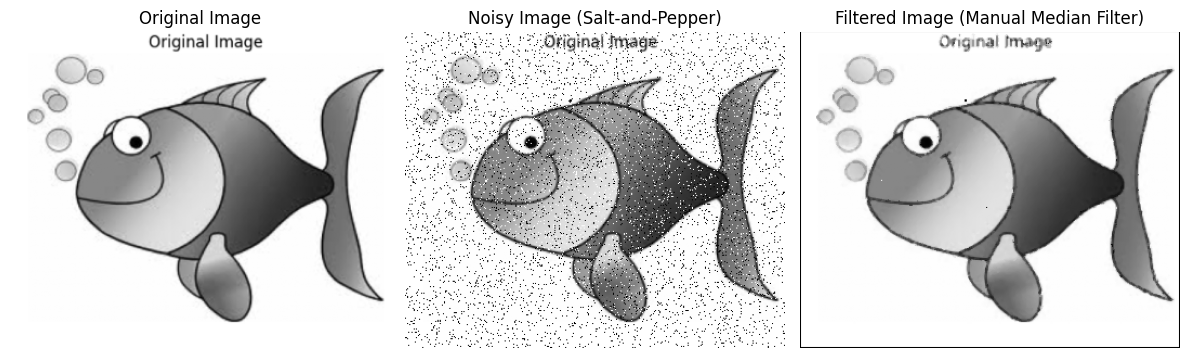

In [7]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Step 1: Upload the image
uploaded = files.upload()

# 🔹 Step 2: Auto-detect uploaded filename
filename = next(iter(uploaded))
print("✅ Uploaded file:", filename)

# 🔹 Step 3: Read image in grayscale
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# 🔹 Step 4: Add salt-and-pepper noise
salt_prob = 0.05
pepper_prob = 0.05

noisy_image = np.copy(image)

num_salt = np.ceil(salt_prob * image.size)
coords_salt = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
noisy_image[tuple(coords_salt)] = 255

num_pepper = np.ceil(pepper_prob * image.size)
coords_pepper = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
noisy_image[tuple(coords_pepper)] = 0

# 🔹 Step 5: Manual median filter
filtered_image = np.zeros_like(noisy_image)
height, width = noisy_image.shape

for i in range(1, height - 1):
    for j in range(1, width - 1):
        neighborhood = noisy_image[i - 1:i + 2, j - 1:j + 2]
        median_value = np.median(neighborhood)
        filtered_image[i, j] = median_value

# 🔹 Step 6: Display the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Salt-and-Pepper)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Manual Median Filter)')
plt.axis('off')

plt.tight_layout()
plt.show()


Saving ss.png to ss (4).png
✅ Uploaded file: ss (4).png


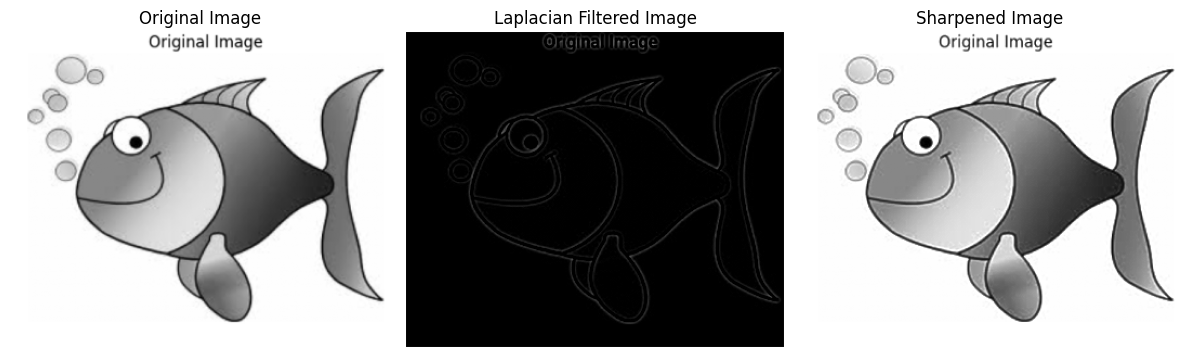

In [8]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Step 1: Upload the image
uploaded = files.upload()

# 🔹 Step 2: Auto-detect uploaded filename
filename = next(iter(uploaded))
print("✅ Uploaded file:", filename)

# 🔹 Step 3: Read image in grayscale
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# 🔹 Step 4: Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

# 🔹 Step 5: Define Laplacian kernel
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

# 🔹 Step 6: Manual convolution using the Laplacian kernel
image_height, image_width = blurred_image.shape
kernel_height, kernel_width = laplacian_kernel.shape
pad_height = kernel_height // 2
pad_width = kernel_width // 2

# Pad the image with zeros
padded_image = np.pad(blurred_image, ((pad_height, pad_height), (pad_width, pad_width)),
                      mode='constant', constant_values=0)

laplacian_image = np.zeros_like(blurred_image, dtype=float)

for i in range(image_height):
    for j in range(image_width):
        region = padded_image[i:i + kernel_height, j:j + kernel_width]
        laplacian_value = np.sum(region * laplacian_kernel)
        laplacian_image[i, j] = laplacian_value

# Clip values to [0,255]
laplacian_image = np.clip(laplacian_image, 0, 255).astype(np.uint8)

# 🔹 Step 7: Create sharpened image (original + Laplacian)
sharpened_image = cv2.add(image, laplacian_image)

# 🔹 Step 8: Display all results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()


Saving ss.png to ss (5).png
✅ Uploaded file: ss (5).png


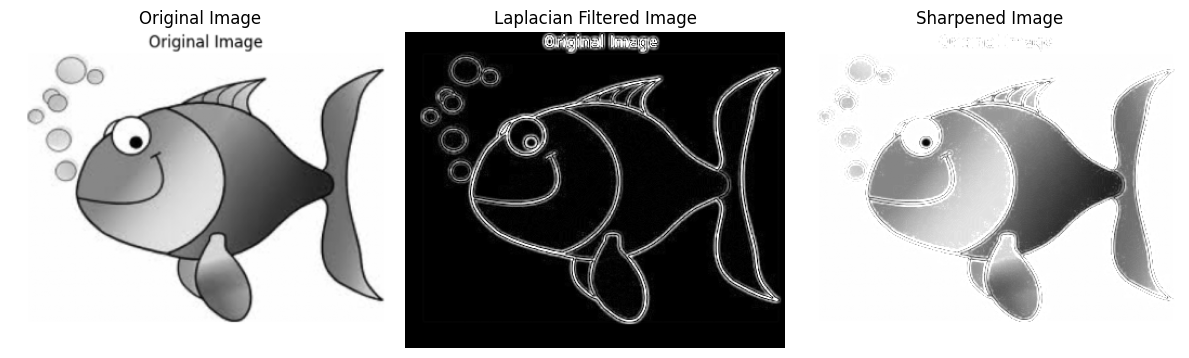

In [9]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Step 1: Upload image
uploaded = files.upload()

# 🔹 Step 2: Get filename automatically
filename = next(iter(uploaded))
print("✅ Uploaded file:", filename)

# 🔹 Step 3: Read in grayscale
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# 🔹 Step 4: Apply Gaussian blur (to reduce noise)
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

# 🔹 Step 5: Apply OpenCV Laplacian filter
laplacian_image = cv2.Laplacian(blurred_image, cv2.CV_64F, ksize=3)
laplacian_image = np.absolute(laplacian_image)
laplacian_image = np.clip(laplacian_image, 0, 255).astype(np.uint8)

# 🔹 Step 6: Create sharpened image (original + edges)
sharpened_image = cv2.add(image, laplacian_image)

# 🔹 Step 7: Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()
